## Table Of Content
### Steps are:
1. Load the dataset.
2. Preprocess the data (handling missing values, encoding categorical variables, etc.).
3. Split the data into features (X) and the response variable (y).
4. Define the machine learning models: KNN, SVM, Logistic Regression, Random Forest, Decision Tree, Naive Bayes.
5. Perform cross-validation with different folds (1-fold, 3-fold, 5-fold, and 10-fold).
6. Evaluate each model using performance measures such as accuracy, precision, recall, F1-score, and ROC-AUC.
7. Create a summary report to interpret the results and visualize them using charts.

# import requaired libraries

In [344]:
import pandas as pd
import numpy as np

# Import Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Data Visualization Libraries
import seaborn as sns

# Converting the columns/Datatypes
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load DataSet

In [345]:
data = pd.read_excel(r"D:\BS DS\Six Semester\Machine Learning\Lab\Heart Assignment #4/Heart_Data.xlsx")

After collecting data, we need to know what are the shape of this dataset, Here we have attribute`(property)` called `data.shape`

For that we have 2 type of methods to show the shape of the datasets.

1. `len(data.index), len(data.columns)`
- data.shape

In [346]:
data.shape

(200, 16)

Display the Head & Tail of the dataset

In [347]:
data.head()

,serialNo,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,1,urban,64,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.0,75,no,yes
1,2,rural,61,none,greater than 3,job/business,middle,no smoker,married,>3,ghee,none,5.2,75,no,no
2,3,rural,75,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.3,75,no,no
3,4,urban,70,none,less than 3,other wages,middle,no smoker,single,<3,ghee,two time,5.5,70,no,no
4,5,rural,53,none,greater than 3,other wages,middle,no smoker,married,>3,ghee,ex fast food,5.0,50,no,yes


In [348]:
data.tail()

,serialNo,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
195,196,rural,61,none,greater than 3,none,high,smoker,single,<3,oil,none,5.6,68,no,no
196,197,urban,60,irregular,less than 3,job/business,middle,no smoker,single,<3,ghee,three time,5.7,75,no,no
197,198,urban,22,irregular,greater than 3,job/business,middle,no smoker,single,>3,ghee,others,5.5,59,no,no
198,199,urban,23,none,greater than 3,none,low,no smoker,single,>3,ghee,others,5.1,74,no,no
199,200,urban,35,none,less than 3,job/business,middle,no smoker,married,>3,ghee,one time,5.2,64,no,no


After the data collection and checking the dataset proced to the next step

# Exploring Data Analysis (EDA)

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   serialNo        200 non-null    int64  
 1   area            200 non-null    object 
 2   age             200 non-null    int64  
 3   exercise        200 non-null    object 
 4   fast_food_new   200 non-null    object 
 5   occupation      200 non-null    object 
 6   incom_catg      200 non-null    object 
 7   smoking         200 non-null    object 
 8   marital_status  200 non-null    object 
 9   meat_intake     200 non-null    object 
 10  cooking_oil     200 non-null    object 
 11  fast_food       200 non-null    object 
 12  height          200 non-null    float64
 13  weight          200 non-null    int64  
 14  bypass          200 non-null    object 
 15  heart_attack    200 non-null    object 
dtypes: float64(1), int64(3), object(12)
memory usage: 25.1+ KB


In [350]:
data.isna()

,serialNo,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [351]:
data.isna().sum()

serialNo          0
area              0
age               0
exercise          0
fast_food_new     0
occupation        0
incom_catg        0
smoking           0
marital_status    0
meat_intake       0
cooking_oil       0
fast_food         0
height            0
weight            0
bypass            0
heart_attack      0
dtype: int64

In [352]:
data.isna().any()

serialNo          False
area              False
age               False
exercise          False
fast_food_new     False
occupation        False
incom_catg        False
smoking           False
marital_status    False
meat_intake       False
cooking_oil       False
fast_food         False
height            False
weight            False
bypass            False
heart_attack      False
dtype: bool

- **Get object features**
     - Using this method, we can see how many `object(categorical)` type of feature exists in dataset

In [353]:
data.describe(include="O")

,area,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,bypass,heart_attack
count,200,200,200,200,200,200,200,200,200,200,200,200
unique,2,3,2,3,3,2,2,2,3,8,2,2
top,urban,none,less than 3,job/business,middle,no smoker,married,>3,ghee,one time,no,no
freq,140,123,130,86,98,133,123,143,123,96,194,154


As we can see abouve result there are few feature is categorical

### To know how many unique values

In [354]:
data.area.value_counts()

area
urban    140
rural     60
Name: count, dtype: int64

<Axes: ylabel='area'>

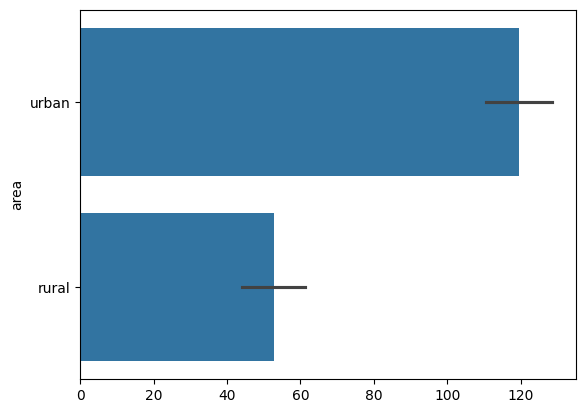

In [355]:
sns.barplot(data['area'])

In [356]:
data.exercise.value_counts()

exercise
none         123
regular       42
irregular     35
Name: count, dtype: int64

<Axes: ylabel='exercise'>

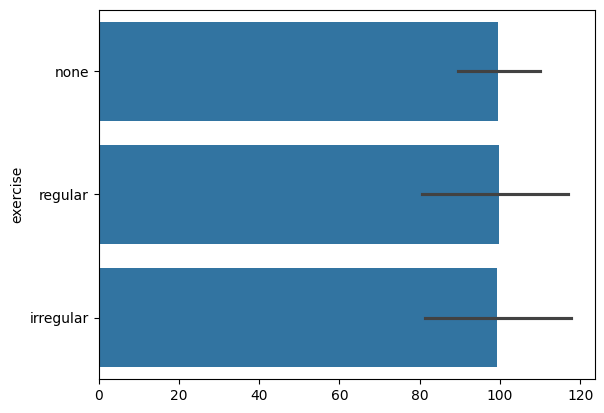

In [357]:
sns.barplot(data['exercise'])

In [358]:
data.fast_food_new.value_counts()

fast_food_new
less than 3       130
greater than 3     70
Name: count, dtype: int64

<Axes: ylabel='fast_food_new'>

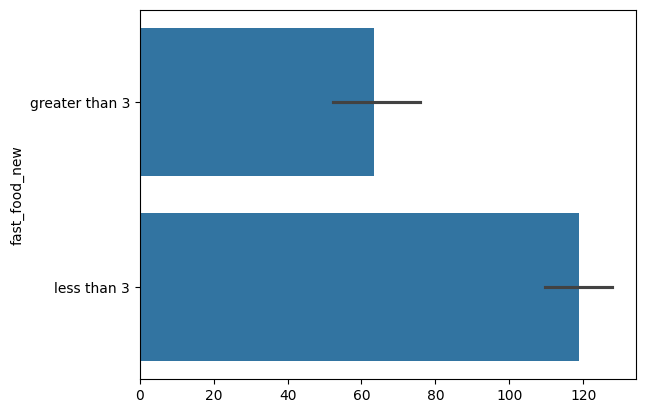

In [359]:
sns.barplot(data['fast_food_new'])

In [360]:
data.occupation.value_counts()

occupation
job/business    86
other wages     76
none            38
Name: count, dtype: int64

<Axes: ylabel='occupation'>

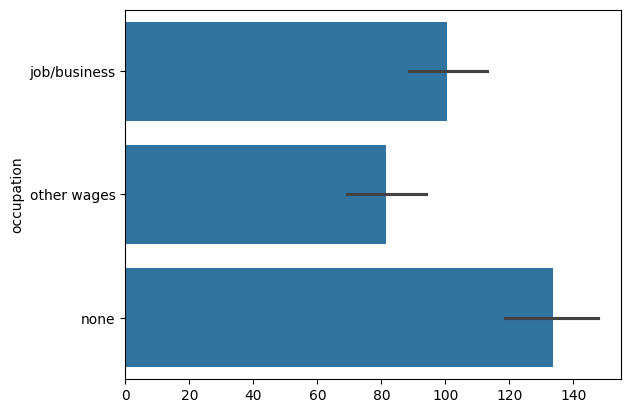

In [361]:
sns.barplot(data['occupation'])

In [362]:
data.incom_catg.value_counts()

incom_catg
middle    98
low       87
high      15
Name: count, dtype: int64

<Axes: ylabel='incom_catg'>

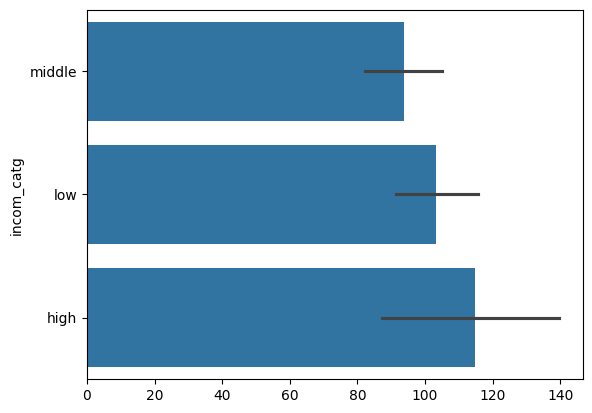

In [363]:
sns.barplot(data['incom_catg'])

In [364]:
data.smoking.value_counts()

smoking
no smoker    133
smoker        67
Name: count, dtype: int64

<Axes: ylabel='smoking'>

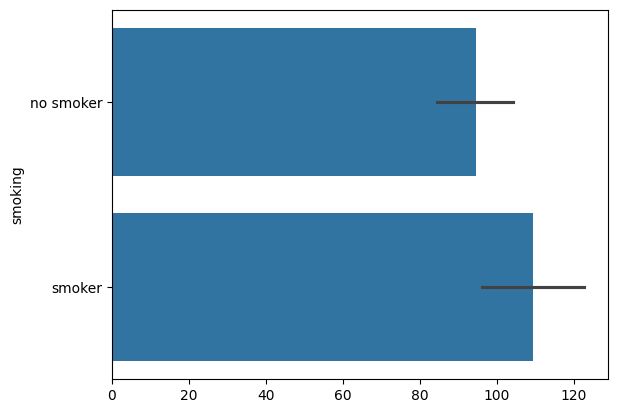

In [365]:
sns.barplot(data['smoking'])

In [366]:
data.marital_status.value_counts()

marital_status
married    123
single      77
Name: count, dtype: int64

<Axes: ylabel='marital_status'>

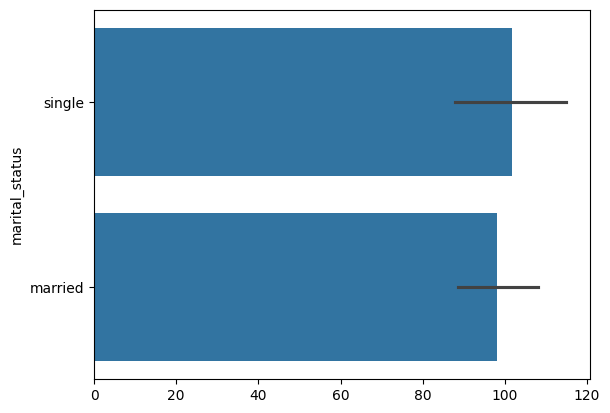

In [367]:
sns.barplot(data['marital_status'])

In [368]:
data.meat_intake.value_counts()

meat_intake
>3    143
<3     57
Name: count, dtype: int64

<Axes: ylabel='meat_intake'>

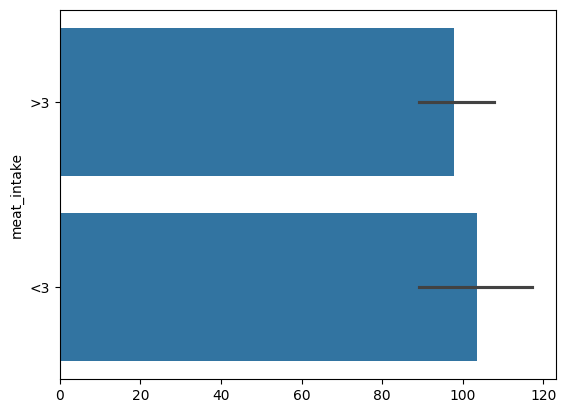

In [369]:
sns.barplot(data['meat_intake'])

In [370]:
data.cooking_oil.value_counts()

cooking_oil
ghee         123
oil           69
desi ghee      8
Name: count, dtype: int64

<Axes: ylabel='cooking_oil'>

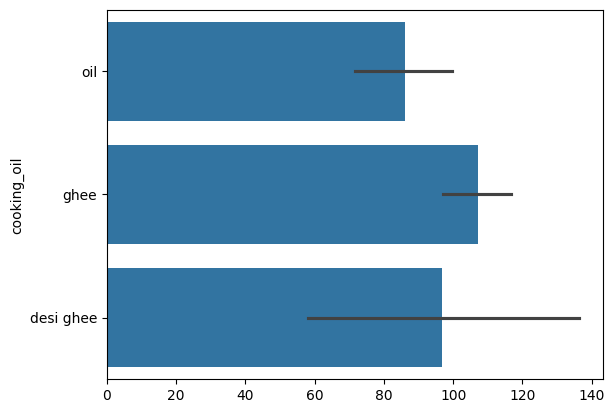

In [371]:
sns.barplot(data['cooking_oil'])

In [372]:
data.fast_food.value_counts()

fast_food
one time        96
ex fast food    42
two time        31
none            22
three time       3
others           3
four time        2
five time        1
Name: count, dtype: int64

<Axes: ylabel='fast_food'>

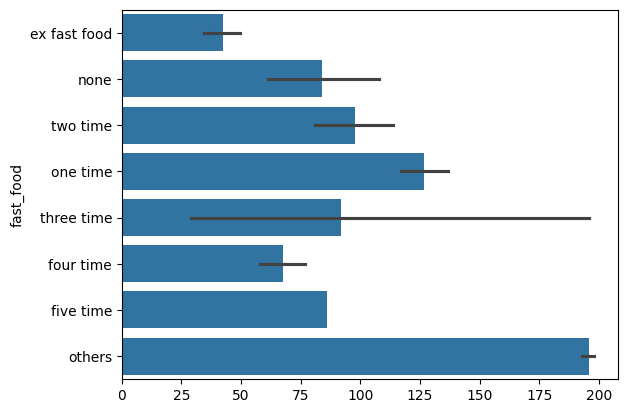

In [373]:
sns.barplot(data['fast_food'])

In [374]:
data.bypass.value_counts()

bypass
no     194
yes      6
Name: count, dtype: int64

<Axes: ylabel='bypass'>

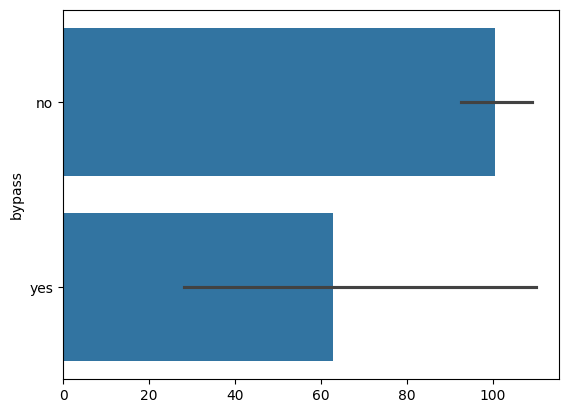

In [375]:
sns.barplot(data['bypass'])

In [376]:
data.heart_attack.value_counts()

heart_attack
no     154
yes     46
Name: count, dtype: int64

<Axes: ylabel='heart_attack'>

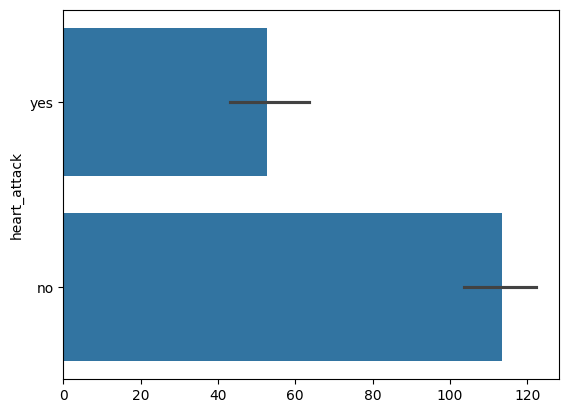

In [377]:
sns.barplot(data['heart_attack'])

In [378]:
data.describe()

,serialNo,age,height,weight
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,47.845000,5.365300,65.200000
std,57.879185,16.595422,0.493347,10.195575
min,1.000000,16.000000,2.900000,40.000000
25%,50.750000,35.750000,5.000000,60.000000
50%,100.500000,47.000000,5.350000,65.000000
75%,150.250000,60.000000,5.800000,70.000000
max,200.000000,85.000000,6.500000,100.000000


## Remove the unnecssary columns for our dataset

In [379]:
data.drop(columns=['serialNo'], inplace=True)

In [380]:
data.head()

,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,urban,64,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.0,75,no,yes
1,rural,61,none,greater than 3,job/business,middle,no smoker,married,>3,ghee,none,5.2,75,no,no
2,rural,75,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.3,75,no,no
3,urban,70,none,less than 3,other wages,middle,no smoker,single,<3,ghee,two time,5.5,70,no,no
4,rural,53,none,greater than 3,other wages,middle,no smoker,married,>3,ghee,ex fast food,5.0,50,no,yes


## Let's convert charater column to numeric for model performence

- Encode categorical variables using `label encoding` technique

In [381]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [382]:
data.head()

,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,1,64,1,0,0,2,0,1,1,2,0,5.0,75,0,1
1,0,61,1,0,0,2,0,0,1,1,3,5.2,75,0,0
2,0,75,1,0,0,2,0,1,1,2,0,5.3,75,0,0
3,1,70,1,1,2,2,0,1,0,1,7,5.5,70,0,0
4,0,53,1,0,2,2,0,0,1,1,0,5.0,50,0,1


## Highlight our Target column and seprate from our dataset

In [383]:
x = data.drop(['heart_attack'], axis='columns')

In [384]:
y = data.heart_attack
y.head()

0    1
1    0
2    0
3    0
4    1
Name: heart_attack, dtype: int32

# Split the data into features (X) and the response variable (y)

In [385]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.30)

print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (140, 14)
Testing set shape:  (60, 14)


# Define the machine learning models: KNN, SVM, Logistic Regression, Random Forest, Decision Tree, Naive Bayes.

    let's start to train our models one by one

### Logistic regreession model

In [386]:
# Create the LogisticRegression model with increased max_iter
lr = LogisticRegression(max_iter=1000)
model1 = lr.fit(X_train, y_train)

In [387]:
model1.score(X_test,y_test)

0.8

### Random Forest regreession model

In [388]:
rm = RandomForestClassifier()
model2 = rm.fit(X_train, y_train)


In [389]:
model2.score(X_test, y_test)

0.8